In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output
import numpy as np
import ipywidgets as widgets

In [2]:
def dd(s, i, incid, incub, rate_m):  # Derivative of the dead population
    return (rate_m/incub) * i

def dr(s, i, incid, incub, rate_m):  # Derivative of the restablished population
    return i / incub

def ds(s, i, incid, incub, rate_m):  # Derivative of the sane population
    return -(incid * s * i)

def di(s, i, incid, incub, rate_m):  # Derivative of the infected population
    return  - ds(s, i, incid, incub, rate_m) \
            - dr(s, i, incid, incub, rate_m) \
            - dd(s,i, incid, incub, rate_m)

In [3]:
def euler_step(prev, deriv):
    return max(prev + (1/euler_steps)*deriv, 0)
        
def simulate(transm, contacts, incub, rate_m):
    s,i,r,d = [i_s], [i_i], [i_r], [i_d]
    incid = (transm * contacts) / incub
    
    # Euler simulation
    for t in range(1,days):
        es, ei, er, ed = s[t-1], i[t-1], r[t-1], d[t-1]
    
        for step in range(euler_steps):
            es = euler_step(es, ds(es, ei, incid, incub, rate_m))
            ei = euler_step(ei, di(es, ei, incid, incub, rate_m))
            er = euler_step(er, dr(es, ei, incid, incub, rate_m))
            ed = euler_step(ed, dd(es, ei, incid, incub, rate_m))
    
        s.append(es)
        i.append(ei)
        r.append(er)
        d.append(ed)
    
    return s,i,r,d

In [4]:
def plot(s,i,r,d):
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(1, 1, 1)
    sane, = ax.plot(s, label="Sane")
    infe, = ax.plot(i, label="Infected")
    rest, = ax.plot(r, label="Restablished")
    dead, = ax.plot(d, label="Dead")
    ax.legend()
    plt.show

In [32]:
def init():  
    s,i,r,d =  simulate(transm, contacts, incub, rate_m)
    
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(1, 1, 1)
    sane, = ax.plot(s, label="Sane")
    infe, = ax.plot(i, label="Infected")
    rest, = ax.plot(r, label="Restablished")
    dead, = ax.plot(d, label="Dead")
    ax.legend()
    plt.show
    
    def updater(transm, contacts, incub, rate_m):
        s,i,r,d = simulate(transm, contacts, incub, rate_m)
        sane.set_ydata(s)
        infe.set_ydata(i)
        rest.set_ydata(r)
        dead.set_ydata(d)
        fig.canvas.draw_idle()
        print("Death toll : ", d[-1]*100, "%")
    
    return updater

In [33]:
i_s = 0.95                   # Initial sane population (ratio)
i_i = 1 - i_s                # Initial infected population (ratio)
i_r = 0                      # Initial restablished population (ratio)
i_d = 0                      # Initial dead population (ratio)

transm = 0.2                 # Transmission rate per contact
contacts = 10                # Daily number of contacts
incub = 20                   # Incubation period
rate_m = 0.08                # Mortality rate

days = 365                   # Days to simulate
euler_steps = 200            # Steps per day (precision of the Euler method)

In [34]:
transm_w = widgets.FloatSlider(value=transm, min=0.1, max=1, step=0.1, description="Transmission rate", continuous_update=True)
incub_w = widgets.IntSlider(value=incub, min=4, max=40, step=2, description="Incubation days", continuous_update=True)
contacts_w = widgets.IntSlider(value=contacts, min=1, max=25, step=1, description="Daily contacts", continuous_update=True)
rate_m_w = widgets.FloatSlider(value=rate_m, min=0.01, max=1, step=0.05, description="Mortality rate", continuous_update=True)

<IPython.core.display.Javascript object>


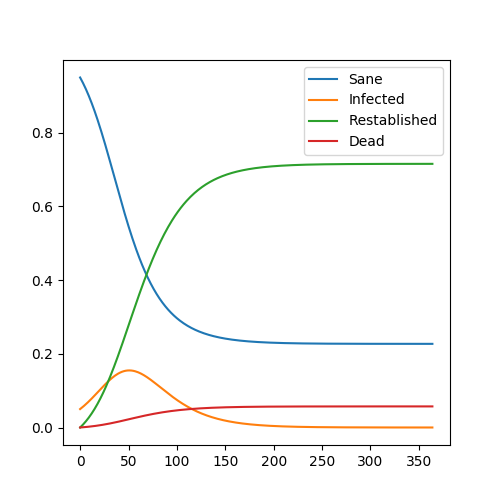

interactive(children=(FloatSlider(value=0.2, description='Transmission rate', max=1.0, min=0.1), IntSlider(val…

<function __main__.init.<locals>.updater(transm, contacts, incub, rate_m)>

In [35]:
updater = init()
widgets.interact(updater, transm=transm_w, contacts=contacts_w, incub=incub_w, rate_m=rate_m_w)